# 다양한 패턴의 2차원 상의 점을 구분해내는 방법

# 패턴 데이터 생성
### 그림을 바탕으로 데이터 생성 - 선형관계

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification

In [6]:
# 관측치의 합은 300개
# 두 클러스터 대부분의 점들이 잘 구분 되며 우상향하는 모습 갖기
X_1, y_1 = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, 
                               random_state=1, n_clusters_per_class=1,
                               n_classes=2, class_sep=3)
# 우상향 만들기
X_1[:,1] =(X_1[:,0]+X_1[:,1])/2
rng = np.random.RandomState(2)
X_1 += 2*rng.uniform(size=X_1.shape) # dpfj sjgrl

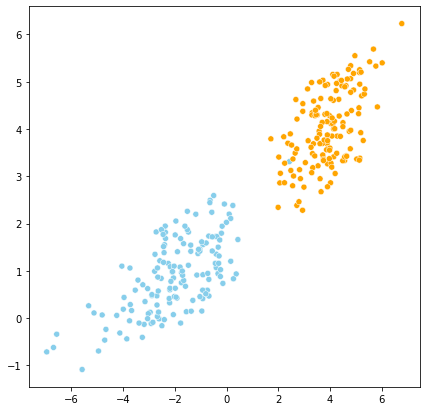

In [9]:
color_code = {0:'Orange', 1:'Skyblue'}
plt.figure(figsize=(7,7))

sns.scatterplot(x=X_1[:,0], y=X_1[:,1], c=[color_code.get(i) for i in y_1])
plt.show();

In [10]:
# (x,y) = (r*dos(theta), r*sin(theta))임을 활용하여 데이터 생성

np.random.seed(1)
def CircleXY(r, n, sigma):
  theta = np.random.uniform(low=0, high=2*np.pi, size=n)
  x_error = np.random.normal(loc=0.0, scale=sigma, size=n)
  y_error = np.random.normal(loc=0.0, scale=sigma, size=n)

  x_val = r*np.cos(theta) + x_error
  y_val = r*np.sin(theta) + y_error
  return x_val, y_val, np.repeat(r, n)

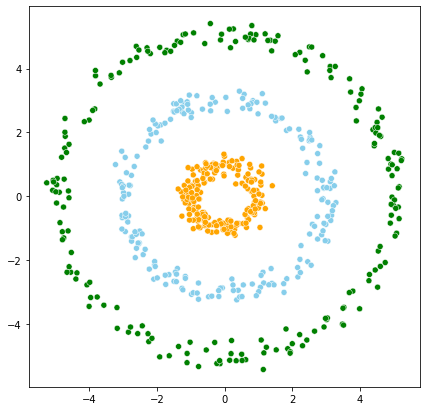

In [12]:
# Concentric circle plot
plt.figure(figsize=(7, 7))
n = 200
r_list = [1, 3, 5]
sigma = 0.2
param_lists = [(r, n, sigma) for r in r_list]
coordinates = [CircleXY(param[0], param[1], param[2]) for param in param_lists]
color_code = {1:'Orange', 3:'Skyblue', 5:'Green'}

for j in range(0, len(coordinates)):
  x,y,group = coordinates[j]
  sns.scatterplot(x=x, y=y, c=[color_code.get(i) for i in group])
plt.show();